# All momentum indicators

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import classification_report_generator as crg
from ta.momentum import AwesomeOscillatorIndicator
from ta.momentum import KAMAIndicator
from ta.momentum import PercentagePriceOscillator
from ta.momentum import PercentageVolumeOscillator
from ta.momentum import ROCIndicator
from ta.momentum import RSIIndicator
from ta.momentum import StochRSIIndicator
from ta.momentum import StochasticOscillator
from ta.momentum import TSIIndicator
from ta.momentum import UltimateOscillator
from ta.momentum import WilliamsRIndicator
import sys
sys.path.insert(0, '..')
import useful_functions as uf

In [62]:
# df = pd.read_csv("../data/BTCUSDT-hour-target.csv") #Starting
# df = pd.read_csv("../data/BTCUSDT-hour-target-dip.csv") #dip

df = pd.read_csv("../data/BTCUSDT-hour-target-features.csv") #Default continuing
# df = pd.read_csv("../data/BTCUSDT-hour-predict.csv") #Prediction

p = "mom_" #change to 'volatility_' to have all indicators with prefix 'volatility_'

In [63]:
# AO
i = AwesomeOscillatorIndicator(df.high, df.low, 10, 70)
df[p + "ao_10_log"] = list(map(lambda x: uf.log_abs(x), i.awesome_oscillator()))

In [64]:
# PPO
i = PercentagePriceOscillator(df.close, 40, 20, 10)
df[p + "ppo_10_signal_log"] = list(map(lambda x: uf.log_abs(x*1000), i.ppo_signal()))

i = PercentagePriceOscillator(df.close, 120, 60, 30)
df[p + "ppo_30_hist"] = i.ppo_hist()


In [65]:
# ROC
i = ROCIndicator(df.close, 50)
df[p + "roc_50_log"] = list(map(lambda x: uf.log_abs(x*100, zeros=True), i.roc()))


In [66]:
# RSI
i = RSIIndicator(df.close, 30)
df[p + "rsi_30"] = i.rsi()

In [67]:
# SR
i = StochasticOscillator(df.close, df.high, df.low, 54, 9)
df[p + "sr_9_signal"] = i.stoch_signal()

In [68]:
# SRSI
i = StochRSIIndicator(df.close, 90, 15, 15)
df[p + "srsi_15_k"] = i.stochrsi_k()

i = StochRSIIndicator(df.close, 180, 30, 30)
df[p + "srsi_30"] = i.stochrsi()

i = StochRSIIndicator(df.close, 60, 10, 10)
df[p + "srsi_10_d"] = i.stochrsi()

In [69]:
# TSI
i = TSIIndicator(df.close, 40, 20)
df[p + "tsi_20_log"] = list(map(lambda x: uf.log_abs(x*100, zeros=True), i.tsi()))

In [70]:
# UO

In [71]:
# WR
i = WilliamsRIndicator(df.high, df.low, df.close, 50)
df[p + "wr_50"] = i.williams_r()

In [72]:
df.to_csv("../data/BTCUSDT-hour-target-features.csv", index=False) #Default
# df.to_csv("../data/BTCUSDT-hour-predict.csv", index=False) #Prediction

## STOP

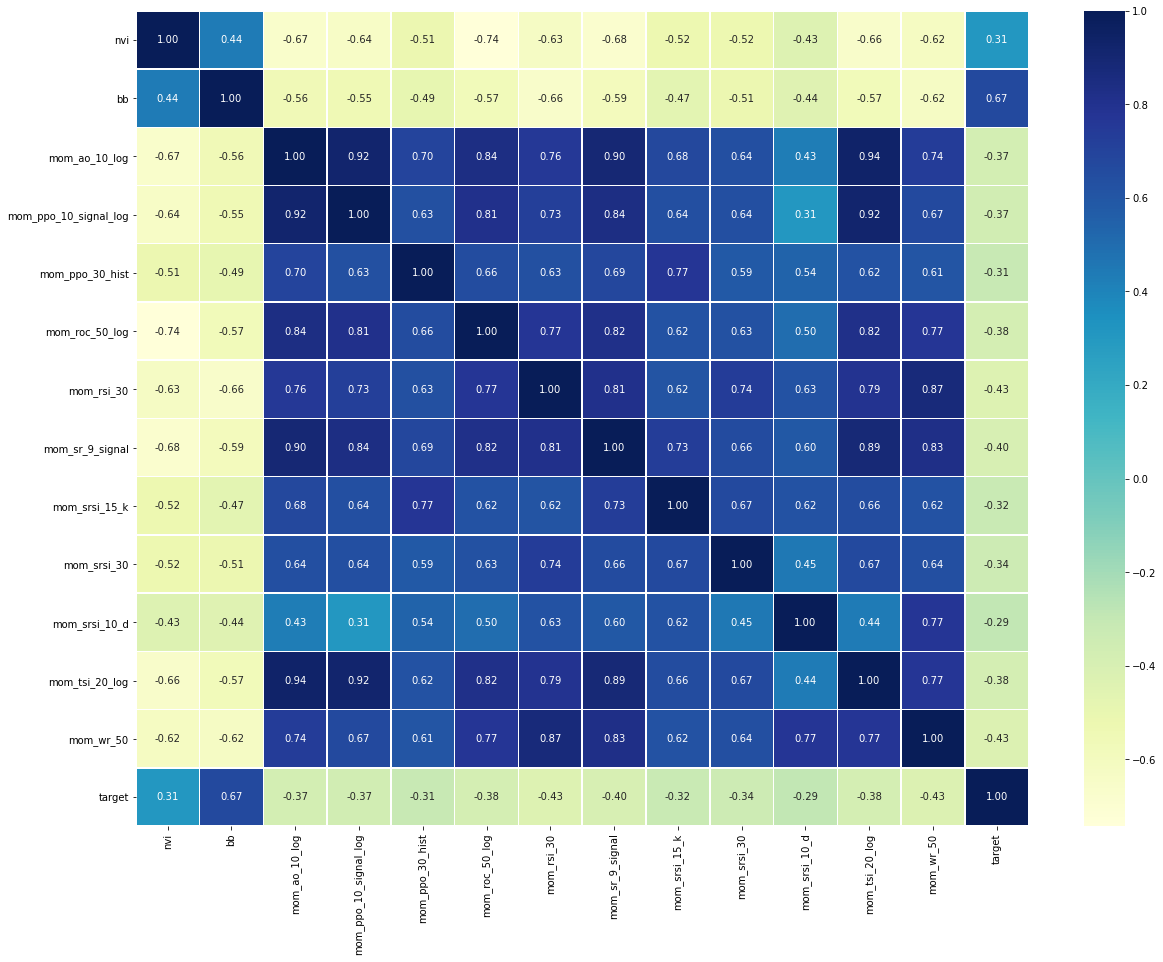

In [59]:
indicators = list(df.columns)[13:]
indicators.append("target")

d = df[list(indicators)].copy()
corr_matrix = d.corr()
fig, ax = plt.subplots(figsize=(20, 15))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu")